In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv("task_data1.csv")

In [4]:
df.head()

,Mood,Current_Workload,Sleeping_Hours,Working_Hours,Deadline_Pressure,Recommended_Task
0,Happy,2,9,4,1,Innovation
1,Surprise,3,8,5,2,Teamwork
2,Neutral,6,11,8,5,Documentation
3,Neutral,7,6,9,4,Routine work
4,Sad,9,5,12,8,Peer support


In [5]:
df.describe()

,Current_Workload,Sleeping_Hours,Working_Hours,Deadline_Pressure
count,384.000000,384.000000,384.000000,384.000000
mean,6.130208,6.283854,9.174479,5.651042
std,3.311303,3.387144,4.400721,3.305680
min,0.000000,0.000000,2.000000,0.000000
25%,3.000000,4.000000,5.000000,2.000000
50%,7.000000,6.000000,9.000000,6.000000
75%,9.000000,9.000000,13.000000,9.000000
max,10.000000,12.000000,16.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Mood               384 non-null    object
 1   Current_Workload   384 non-null    int64 
 2   Sleeping_Hours     384 non-null    int64 
 3   Working_Hours      384 non-null    int64 
 4   Deadline_Pressure  384 non-null    int64 
 5   Recommended_Task   384 non-null    object
dtypes: int64(4), object(2)
memory usage: 18.1+ KB


In [7]:
df.isnull().sum()

Mood                 0
Current_Workload     0
Sleeping_Hours       0
Working_Hours        0
Deadline_Pressure    0
Recommended_Task     0
dtype: int64

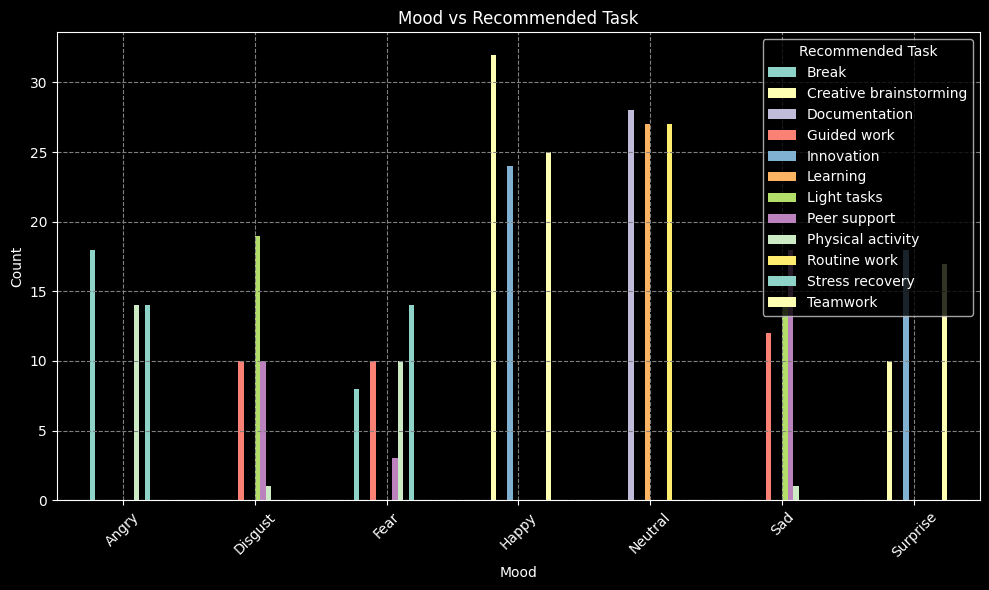

In [8]:
plt.style.use("dark_background")

mood_task_counts = df.groupby(["Mood", "Recommended_Task"]).size().unstack()

mood_task_counts.plot(kind="bar",figsize=(10, 6))
plt.title("Mood vs Recommended Task")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Recommended Task")
plt.tight_layout()
plt.grid(linestyle='--', color='gray')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_11244\1978596282.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sleep_data, labels=tasks)


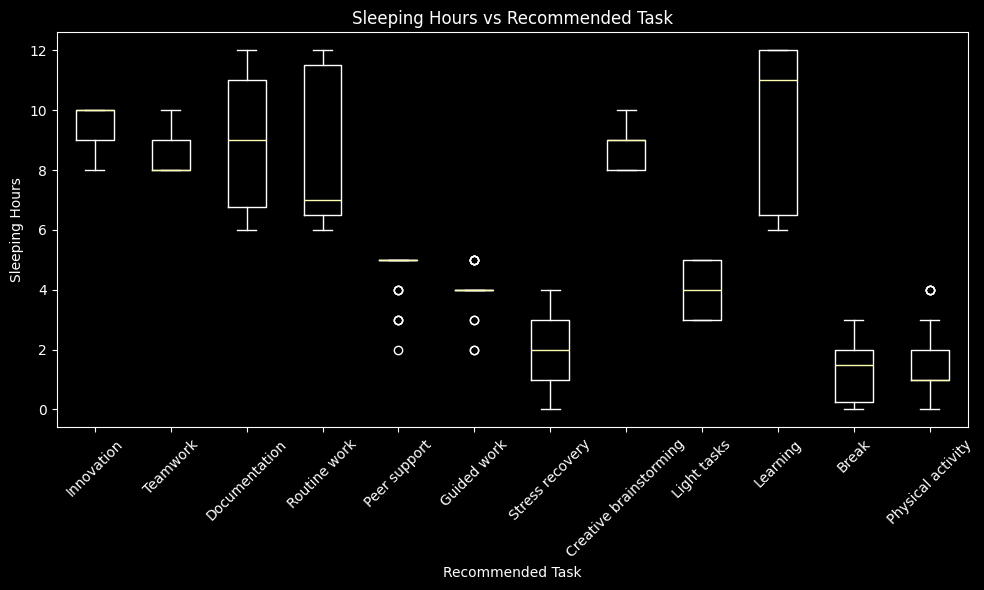

In [9]:
tasks = df["Recommended_Task"].unique()
sleep_data = [df[df["Recommended_Task"] == task]["Sleeping_Hours"]
    for task in tasks
]

plt.figure(figsize=(10, 6))
plt.boxplot(sleep_data, labels=tasks)

plt.title("Sleeping Hours vs Recommended Task")
plt.xlabel("Recommended Task")
plt.ylabel("Sleeping Hours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


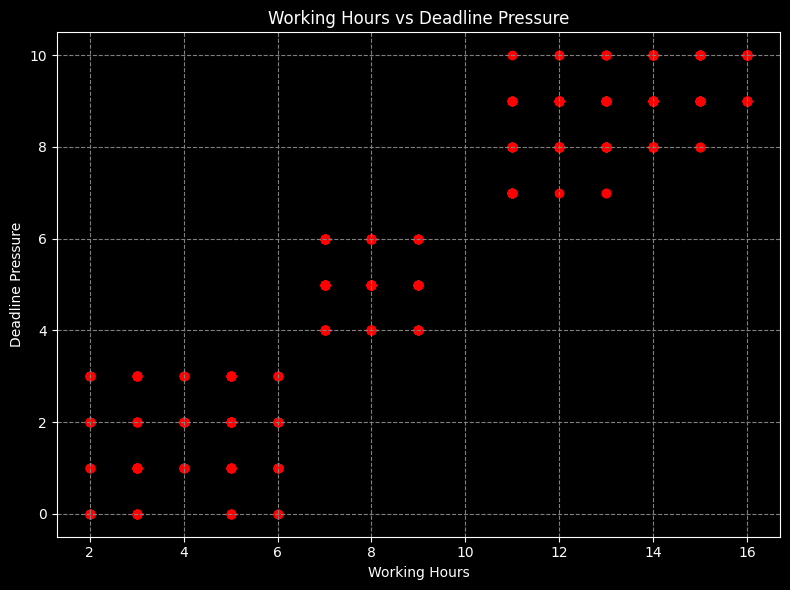

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Working_Hours"],df["Deadline_Pressure"], color="red")

plt.title("Working Hours vs Deadline Pressure")
plt.xlabel("Working Hours")
plt.ylabel("Deadline Pressure")
plt.tight_layout()
plt.grid(linestyle='--', color='gray')
plt.show()


In [11]:
X = df.drop("Recommended_Task", axis=1)
y = df["Recommended_Task"]

In [12]:
md_enc = LabelEncoder()
task_enc = LabelEncoder()

num_cols = ["Current_Workload","Sleeping_Hours","Working_Hours","Deadline_Pressure"]

sclr = StandardScaler()


df[num_cols] = sclr.fit_transform(df[num_cols])

X["Mood"] = md_enc.fit_transform(X["Mood"])
y = task_enc.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


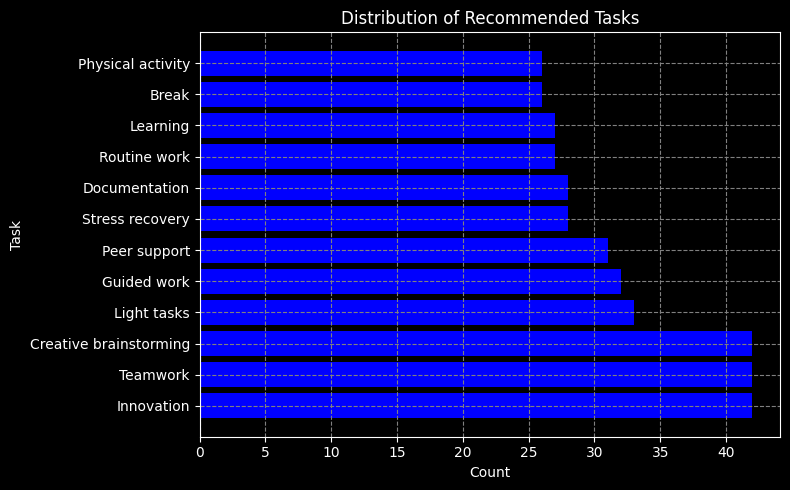

In [14]:
task_counts = df["Recommended_Task"].value_counts()

plt.figure(figsize=(8, 5))
plt.barh(task_counts.index, task_counts.values, color='blue')

plt.title("Distribution of Recommended Tasks")
plt.xlabel("Count")
plt.ylabel("Task")
plt.tight_layout()
plt.grid(linestyle='--', color='gray')
plt.show()


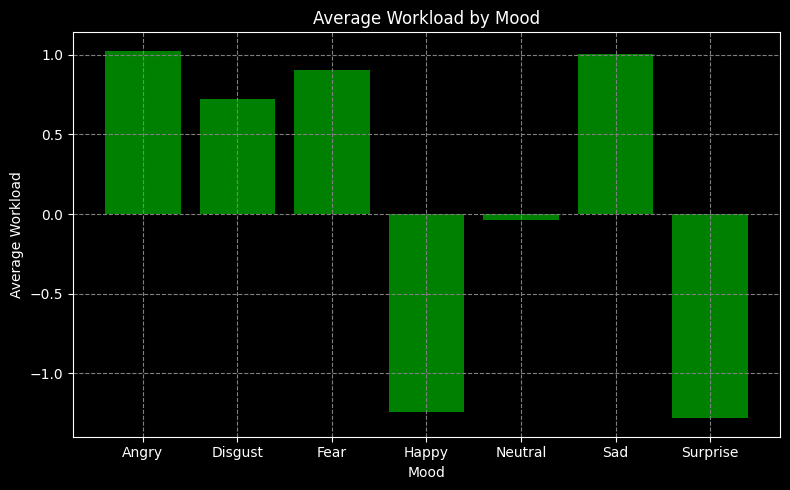

In [15]:
avg_workload = df.groupby("Mood")["Current_Workload"].mean()

plt.figure(figsize=(8, 5))
plt.bar(avg_workload.index, avg_workload.values, color='green')

plt.title("Average Workload by Mood")
plt.xlabel("Mood")
plt.ylabel("Average Workload")
plt.grid(linestyle='--', color='gray')
plt.tight_layout()
plt.show()


In [16]:
ml = RandomForestClassifier(n_estimators=2000, random_state=42)
ml.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",2000
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

In [17]:
yp = ml.predict(X_test)

acc = accuracy_score(yp, y_test)
print("Accuracy: ", round(acc, 2))

Accuracy:  0.55
